HOTEL BOOKING VISUALIZATION PROECT ASHISH KUMAR

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
hd = pd.read_csv(r'../input/hotel-booking/hotel_booking.csv')
plt.style.use('fivethirtyeight')

In [ ]:
hd.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


# Percent who have cancelled their reservation

([<matplotlib.patches.Wedge at 0x7f9799e1c5b0>,
 [Text(-1.0192832832423722, -0.43950152275350596, 'Not Canceled'),
  Text(1.019283283242372, 0.43950152275350635, 'Canceled')],
 [Text(-0.5601466691692315, -0.24152786385553024, '62.96 %'),
  Text(0.5601466691692314, 0.2415278638555305, '37.04 %')])

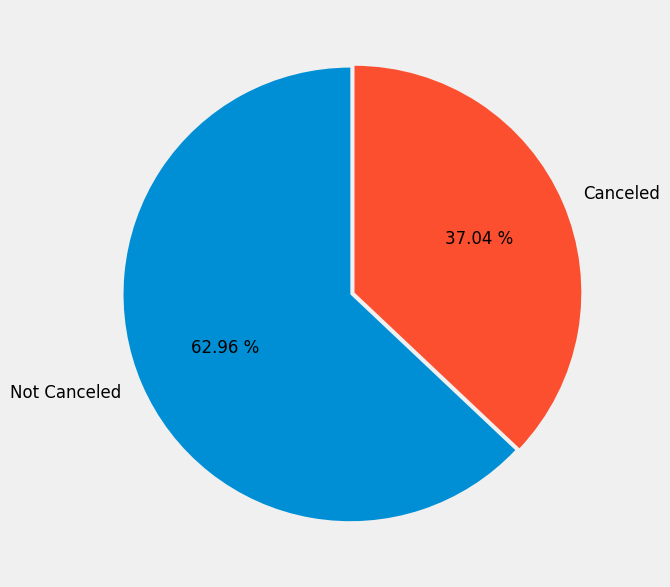

In [ ]:
#[not_canceled, canceled ]
count_list = hd['is_canceled'].value_counts()
plt.figure(figsize = (10, 7))
plt.pie(count_list, labels = ['Not Canceled', 'Canceled'], autopct = "%.2f %%", startangle = 90, explode = (0.01, 0.01), textprops = {'fontsize': 12})

# Distribution of the rates actually paid

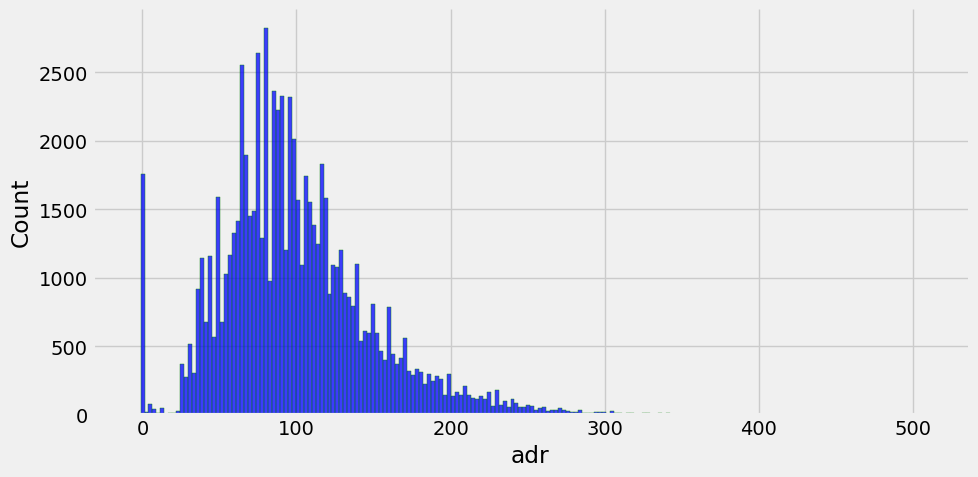

In [ ]:
#plt.figure(figsize=(6,10))
#plt.subplots (2)
sns.displot(data = hd[hd['is_canceled'] == 0], x = 'adr', height = 5, aspect= 2, bins = 200, color = 'b', edgecolor = 'g')

# RugPlot of the rates actually paid

<Axes: xlabel='adr'>

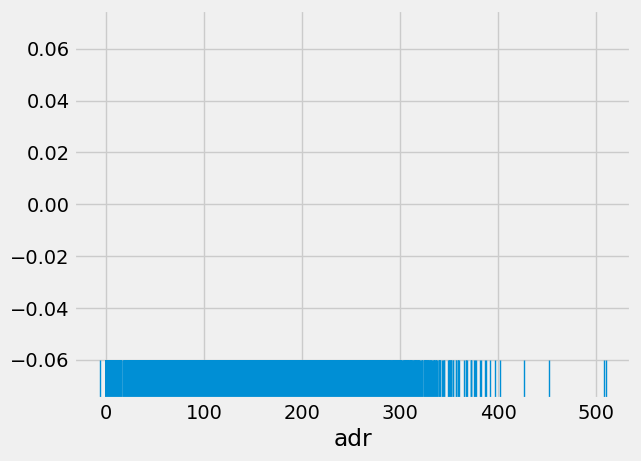

In [ ]:
sns.rugplot(data=hd[hd['is_canceled'] == 0], x = 'adr', height = .1)

# KDE plot comparing canceled and not canceled rates

Text(0.5, 1.0, 'Rates paid for canceled and not canceled reservations')

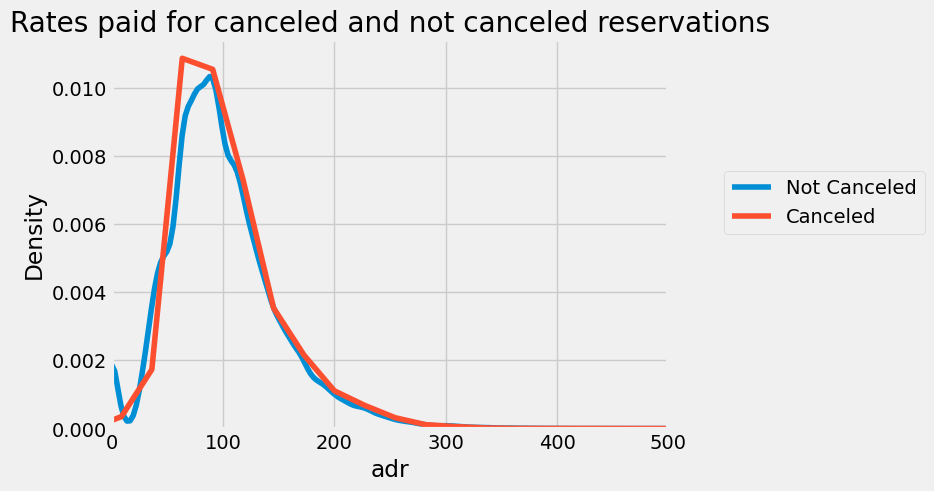

In [ ]:
plt.xlim(0, 500)
sns.kdeplot(data=hd[hd['is_canceled'] == 0], x = 'adr', label = 'Not Canceled') # Its a Probability distribution function
sns.kdeplot(data=hd[hd['is_canceled'] == 1], x = 'adr', label = 'Canceled')
plt.legend(loc=(1.1,0.5))
plt.title('Rates paid for canceled and not canceled reservations')

# KDE Plot using hue parameter

<Axes: xlabel='adr', ylabel='Density'>

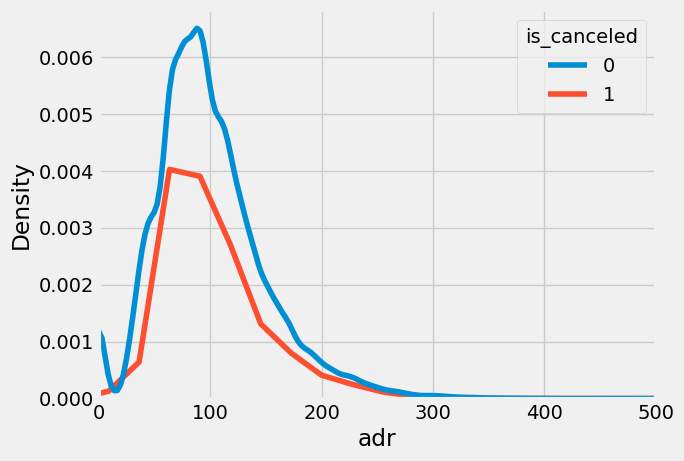

In [ ]:
plt.xlim(0, 500)
sns.kdeplot(data=hd, x = 'adr', label = 'Not Canceled', hue = 'is_canceled') # label is ignored

# Rate change over the years and based on whether it was canceled

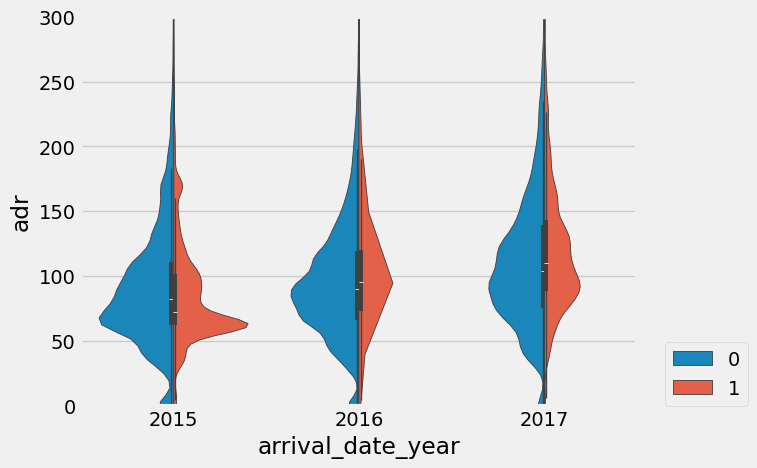

In [ ]:
plt.ylim(0, 300)
sns.violinplot(data = hd, x = 'arrival_date_year', y = 'adr', hue = 'is_canceled', split = True)
plt.legend(loc=(1.05, 0))

# Rate paid over the years

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


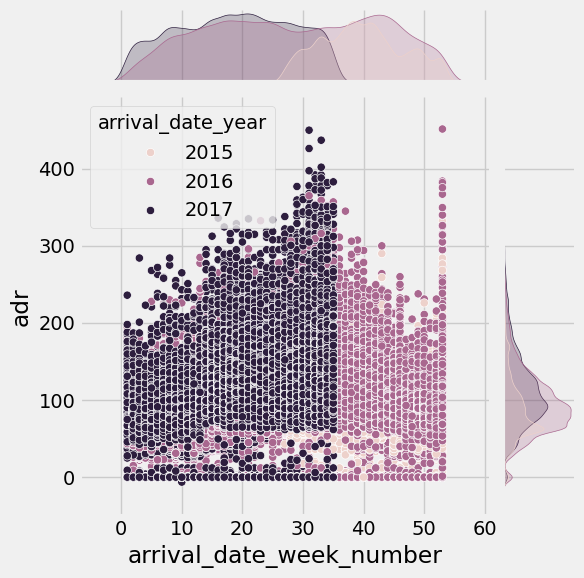

In [ ]:
#plt.ylim(0,500)
sns.jointplot( data = hd[hd['adr']<500], x = 'arrival_date_week_number' , y ='adr' , hue = 'arrival_date_year')

# Cleaning the dataset for pairwise plots

In [ ]:
hd_fact = hd.copy()
hd_fact['children'][hd_fact['children'].isnull()] = hd_fact['children'].mean()
hd_fact['total_child'] = hd_fact['children'] + hd_fact['babies']
hd_fact['total_stay'] = hd_fact['stays_in_weekend_nights'] + hd_fact['stays_in_week_nights']
hd_fact.drop(['reservation_status', 'reservation_status_date', 'name', 'email', 'phone-number', 'credit_card'], axis = 1, inplace= True)
hd_fact.drop(['arrival_date_month', 'arrival_date_day_of_month', 'deposit_type', 'company', 'days_in_waiting_list', 'required_car_parking_spaces'], axis = 1, inplace= True)
hd_fact.drop(['is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'assigned_room_type', 'customer_type'], axis = 1, inplace= True)
hd_fact.drop(['distribution_channel', 'children', 'babies'], axis = 1, inplace= True)
hd_fact['market_segment'] = pd.factorize(hd_fact['market_segment'])[0] + 1
hd_fact['reserved_room_type'] = pd.factorize(hd_fact['reserved_room_type'])[0] + 1
hd_fact['meal'] = pd.factorize(hd_fact['meal'])[0] + 1
hd_fact['country'] = pd.factorize(hd_fact['country'])[0] + 1
hd_fact['hotel'] = pd.factorize(hd_fact['hotel'])[0] + 1
hd_fact.head()


<ipython-input-11-ea6ece034b53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hd_fact['children'][hd_fact['children'].isnull()] = hd_fact['children'].mean()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,reserved_room_type,booking_changes,agent,adr,total_of_special_requests,total_child,total_stay
0,1,0,342,2015,27,0,0,2,1,1,1,1,3,NaN,0.0,0,0.0,0
1,1,0,737,2015,27,0,0,2,1,1,1,1,4,NaN,0.0,0,0.0,0
2,1,0,7,2015,27,0,1,1,1,2,1,2,0,NaN,75.0,0,0.0,1
3,1,0,13,2015,27,0,1,1,1,2,2,2,0,304.0,75.0,0,0.0,1
4,1,0,14,2015,27,0,2,2,1,2,3,2,0,240.0,98.0,1,0.0,2


# Taking care of the NANs

In [ ]:
hd_fact['agent'][hd_fact['agent'].isnull()] = hd_fact['agent'].mean()
hd_fact.isnull().sum()

#hd_fact.head()

<ipython-input-12-b79f200b0c6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hd_fact['agent'][hd_fact['agent'].isnull()] = hd_fact['agent'].mean()


hotel                        0
is_canceled                  0
lead_time                    0
arrival_date_year            0
arrival_date_week_number     0
stays_in_weekend_nights      0
stays_in_week_nights         0
adults                       0
meal                         0
country                      0
market_segment               0
reserved_room_type           0
booking_changes              0
agent                        0
adr                          0
total_of_special_requests    0
total_child                  0
total_stay                   0
dtype: int64

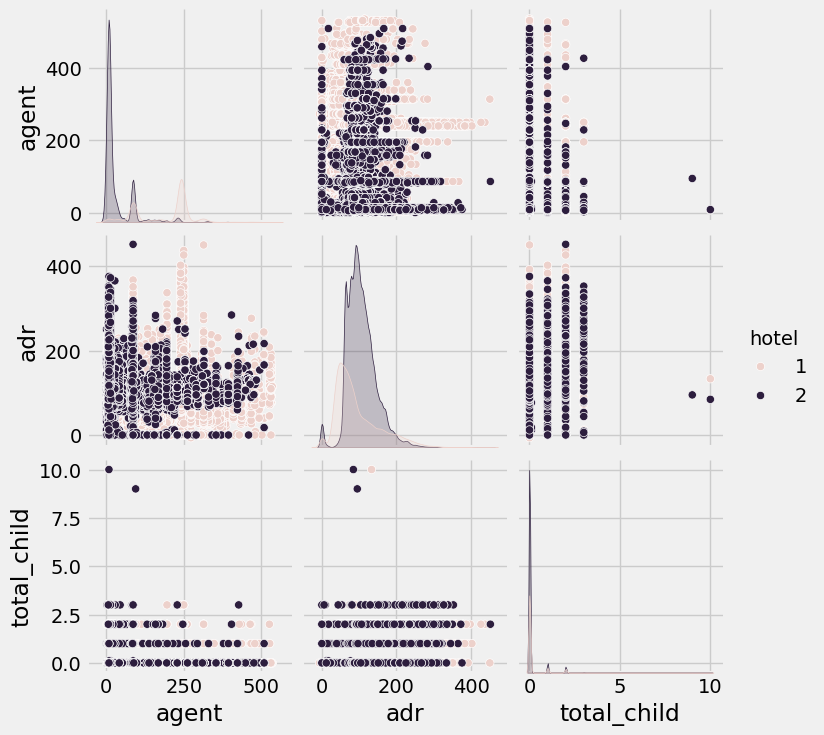

In [ ]:
sns.pairplot(data = hd_fact[hd_fact['adr']<500][['hotel', 'agent', 'adr', 'total_child']], hue ='hotel')

# Reserved room type vs rate and year

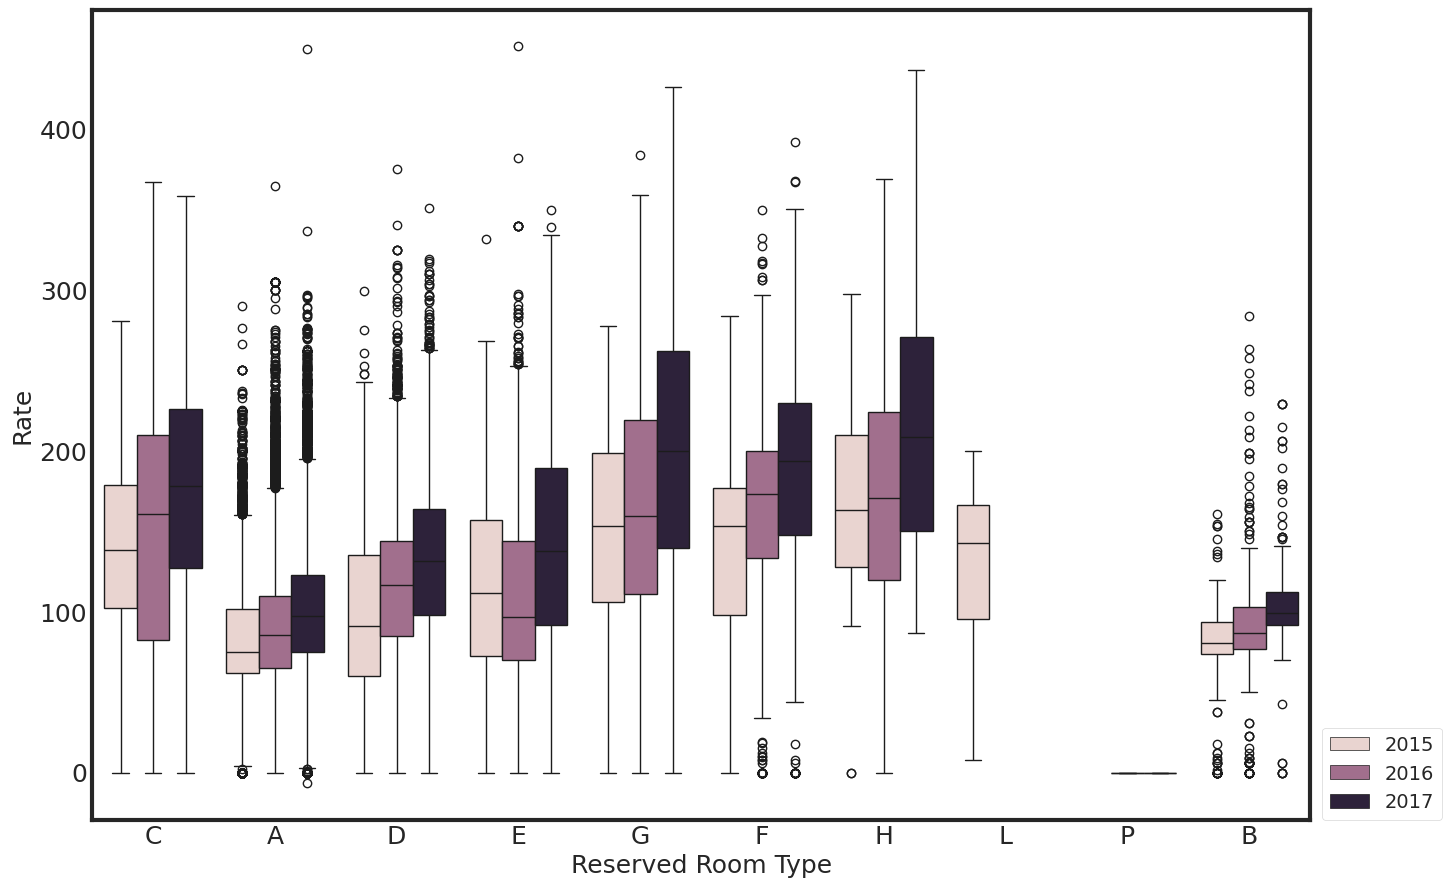

In [ ]:
sns.set_style('ticks')
plt.figure(figsize=(14,10))
sns.boxplot(data = hd[hd['adr']<500], x = 'reserved_room_type', y = 'adr', hue ='arrival_date_year', width = 0.8)
plt.xlabel("Reserved Room Type", fontsize = 18)
plt.xticks(fontsize=18)
plt.ylabel("Rate", fontsize = 18)
plt.yticks(fontsize=18)
plt.legend(loc=(1.01, 0))

# Rate paid based on hotel type and year

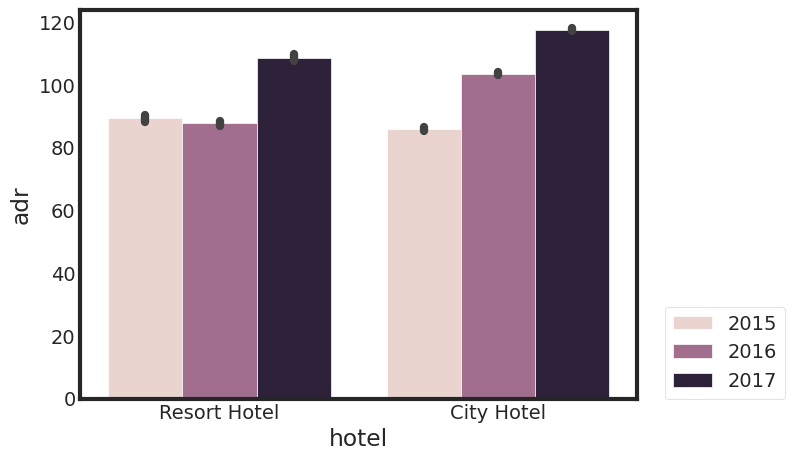

In [ ]:
sns.barplot(data = hd, x = 'hotel', y = 'adr', hue ='arrival_date_year')
plt.legend(loc=(1.05, 0))

# Counting the number of special requests

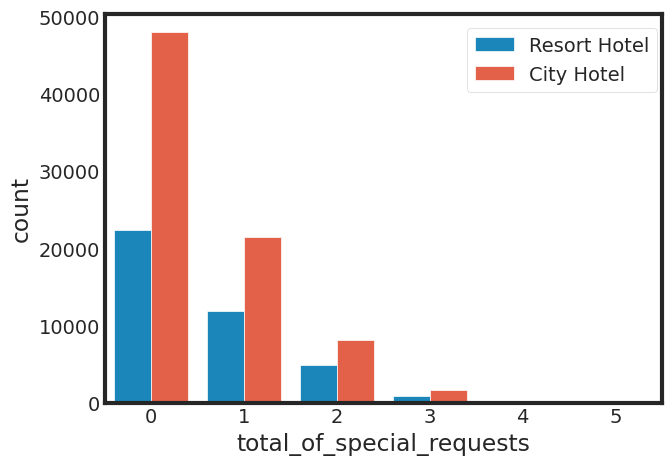

In [ ]:
sns.countplot(data=hd, x = 'total_of_special_requests', hue = 'hotel')
plt.legend(loc=(.65,.8))

# Day of the month vs rate

<Axes: xlabel='arrival_date_day_of_month', ylabel='adr'>

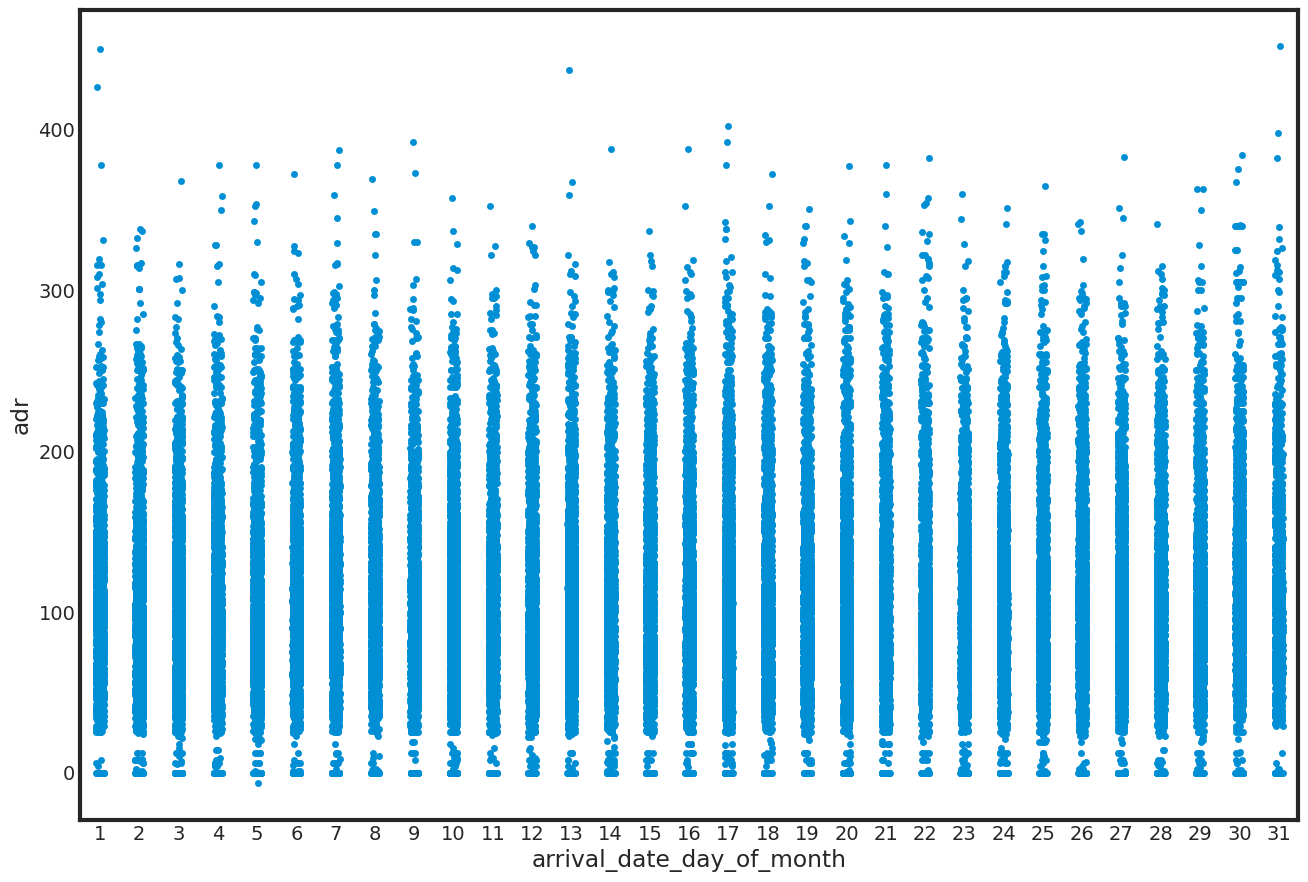

In [ ]:
plt.figure(figsize=(14,10))
sns.stripplot( data = hd[hd['adr']<500], x = 'arrival_date_day_of_month', y = 'adr')


# Rate vs day of the month and month of the year

In [ ]:
hd_pivot = hd.pivot_table(index = 'arrival_date_day_of_month', columns = 'arrival_date_month', values = 'adr')
#stays_in_weekend_nights

<Axes: xlabel='arrival_date_month', ylabel='arrival_date_day_of_month'>

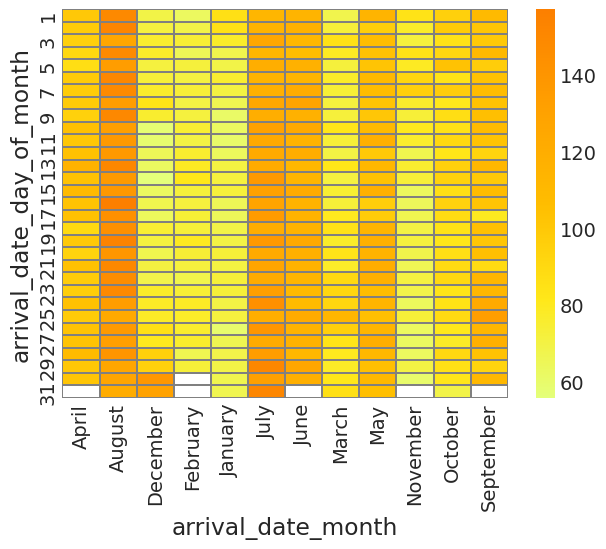

In [ ]:
sns.heatmap(hd_pivot, cmap='Wistia', linecolor='gray', linewidths=.2)

<Axes: xlabel='hotel', ylabel='count'>

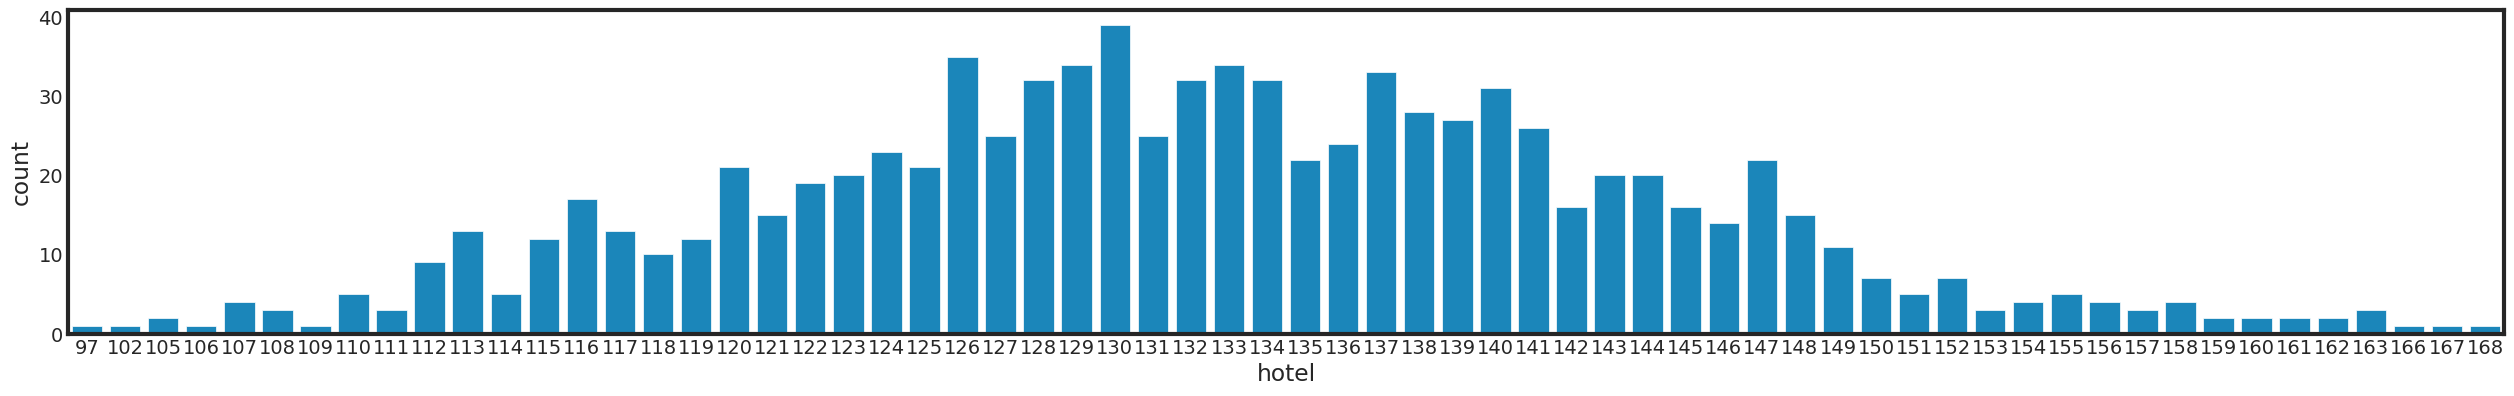

In [ ]:
hd_cop = hd.copy()
hd_cop['area_code'] = hd_cop['phone-number'].apply(lambda num:int(num.split('-')[0]))
#hd_cop.groupby('area_code').count()
plt.figure(figsize=(28,4))
sns.countplot(data=hd_cop.groupby('area_code').count(), x = 'hotel')